**Covariance**

Calculates the covariance between temperature and test scores, and between study hours and test scores

In [1]:
import numpy as np

# Let's assume these are the temperatures in Celsius
temperatures = np.array([30, 32, 28, 31, 33, 29, 34, 35, 36, 37])

# And these are the corresponding test scores
test_scores = np.array([70, 68, 72, 71, 67, 73, 66, 65, 64, 63])

# And these are the corresponding study hours
study_hours = np.array([5, 6, 7, 6, 5, 7, 4, 3, 2, 1])

# Calculate the covariance between temperature and test scores
cov_temp_scores = np.cov(temperatures, test_scores)[0, 1]
print(f"Covariance between temperature and test scores: {cov_temp_scores}")

# Calculate the covariance between study hours and test scores
cov_study_scores = np.cov(study_hours, test_scores)[0, 1]
print(f"Covariance between study hours and test scores: {cov_study_scores}")

Covariance between temperature and test scores: -10.277777777777777
Covariance between study hours and test scores: 6.733333333333334


**An example to calculates the covariance in a data frame is as follow**

In [12]:
# Import the pandas library and the display function
import pandas as pd
from IPython.display import display

# Load the diabetes data from a csv file
diabities_df = pd.read_csv("/workspaces/ImplementingStatisticsWithPython/data/chapter1/diabetes.csv")
diabities_df[['Glucose','Insulin','Outcome']].cov()

,Glucose,Insulin,Outcome
Glucose,1022.248314,1220.935799,7.115079
Insulin,1220.935799,13281.180078,7.175671
Outcome,7.115079,7.175671,0.227483


In [ ]:
An example to calculates the covariance in a text data is as follow:

In [ ]:
An example to calculates the covariance in a image data is as follow:

**Calculates the correlation between study time and test scores, and between TV watching time and test scores**

In [13]:
import numpy as np

# Let's assume these are the study hours
study_hours = np.array([5, 6, 7, 6, 5, 7, 4, 3, 2, 1])

# And these are the corresponding test scores
test_scores = np.array([70, 72, 75, 72, 70, 75, 68, 66, 64, 62])

# And these are the corresponding TV watching hours
tv_hours = np.array([1, 2, 1, 2, 3, 1, 4, 5, 6, 7])

# Calculate the correlation between study hours and test scores
corr_study_scores = np.corrcoef(study_hours, test_scores)[0, 1]
print(f"Correlation between study hours and test scores: {corr_study_scores}")

# Calculate the correlation between TV watching hours and test scores
corr_tv_scores = np.corrcoef(tv_hours, test_scores)[0, 1]
print(f"Correlation between TV watching hours and test scores: {corr_tv_scores}")

Correlation between study hours and test scores: 0.9971289059323629
Correlation between TV watching hours and test scores: -0.9495412844036697


**An example to calculates the concept of outliers and anomalies**

Anomalies in transactions: [2000]
Outliers in ages: [150]


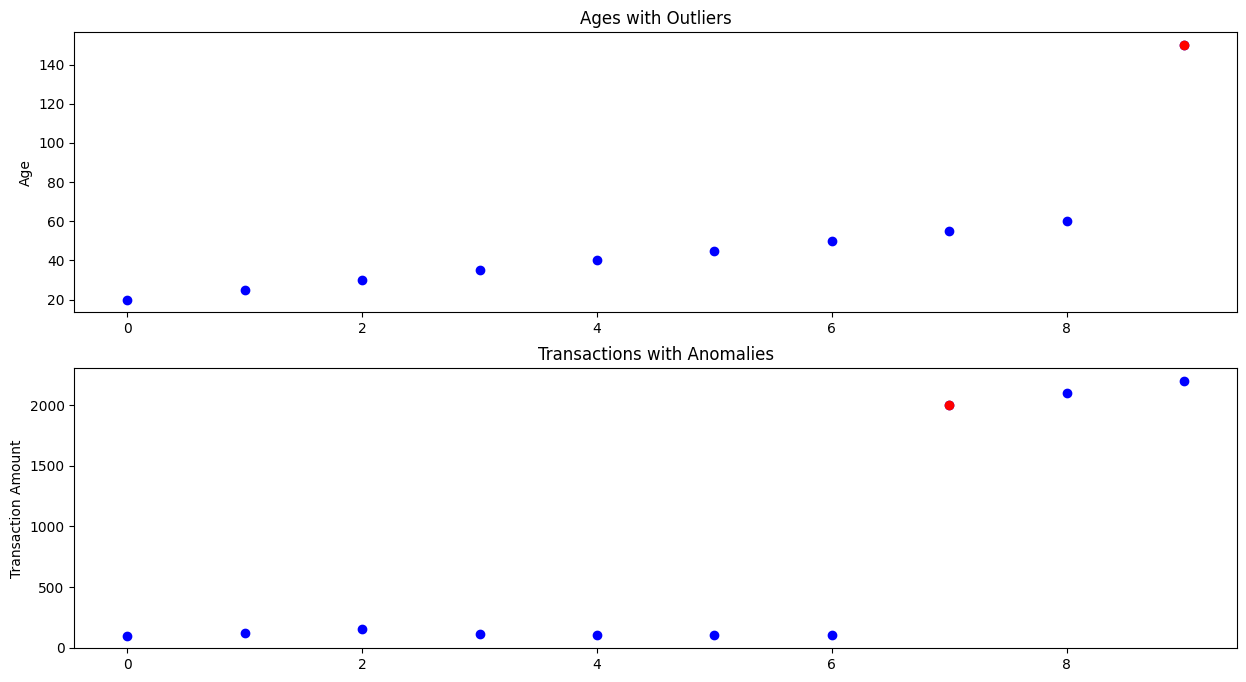

In [16]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Let's assume these are the ages of a group of people
ages = np.array([20, 25, 30, 35, 40, 45, 50, 55, 60, 150])

# Now let's consider a sequence of credit card transactions
transactions = np.array([100, 120, 150, 110, 105, 102, 108, 2000, 2100, 2200])

# Define a function to detect outliers using the Z-score
def detect_outliers(data):
    outliers = []
    threshold = 1
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z_score = (i - mean) / std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

# Define a function to detect anomalies based on sudden increase in transaction amounts
def detect_anomalies(data):
    anomalies = []
    threshold = 1.5  # this could be any value based on your understanding of the data
    mean = np.mean(data)
    
    for i in range(len(data)):
        if i == 0:
            continue  # skip the first transaction
        if data[i] > threshold * data[i-1]:  # if the current transaction is more than twice the previous one
            anomalies.append(data[i])
    return anomalies

anomalies = detect_anomalies(transactions)
print(f"Anomalies in transactions: {anomalies}")

outliers = detect_outliers(ages)
print(f"Outliers in ages: {outliers}")

# Plot ages with outliers in red
fig, (axs1, axs2) = plt.subplots(2, figsize=(15,8))
axs1.plot(ages, 'bo')
axs1.plot([i for i, x in enumerate(ages) if x in outliers], [x for x in ages if x in outliers], 'ro')
axs1.set_title('Ages with Outliers')
axs1.set_ylabel('Age')

# Plot transactions with anomalies in red
axs2.plot(transactions, 'bo')
axs2.plot([i for i, x in enumerate(transactions) if x in anomalies], [x for x in transactions if x in anomalies], 'ro')
axs2.set_title('Transactions with Anomalies')
axs2.set_ylabel('Transaction Amount')
plt.savefig('outliers_anomalies.jpg',dpi=600,bbox_inches='tight')
plt.show()


**Demonstrates the concept of outliers in text data**

In [4]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# Let's assume these are the text entries in our dataset
texts = [
    "I love to play football",
    "The weather is nice today",
    "Python is a powerful programming language",
    "Machine learning is a fascinating field",
    "I enjoy reading books",
    "The Eiffel Tower is in Paris",
    "Outliers are unusual data points that differ significantly from other observations",
    "Anomaly detection is the identification of rare items, events or observations which raise suspicions by differing significantly from the majority of the data"
]

# Convert the texts to word count vectors
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)

# Calculate the length of each text entry
lengths = np.array([len(text.split()) for text in texts])

# Define a function to detect outliers based on text length
def detect_outliers(data):
    outliers = []
    threshold = 1  # this could be any value based on your understanding of the data
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z_score = (i - mean) / std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

outliers = detect_outliers(lengths)
print(f"Outlier text entries based on length: {[texts[i] for i, x in enumerate(lengths) if x in outliers]}")

Outlier text entries based on length: ['Anomaly detection is the identification of rare items, events or observations which raise suspicions by differing significantly from the majority of the data']


**Demonstrates detection of anomalies in text data, based on the Z-score method**

considering the length of words in a text, anomalies in this context would be words that are significantly longer than the average

In [10]:
import numpy as np

def find_anomalies(text):
    # Split the text into words
    words = text.split()
    # Calculate the length of each word
    word_lengths = [len(word) for word in words]
    # Calculate the mean and standard deviation of the word lengths
    mean_length = np.mean(word_lengths)
    std_dev_length = np.std(word_lengths)
    # Define a list to hold anomalies
    anomalies = []
    # Find anomalies: words whose length is more than 1 standard deviations away from the mean
    for word in words:
        z_score= (len(word) - mean_length) / std_dev_length
        if np.abs(z_score) > 1: 
            anomalies.append(word)
    return anomalies

text = "Despite having osteosarchaematosplanchnochondroneuromuelous and osseocarnisanguineoviscericartilaginonervomedullary conditions, he is fit."
print(find_anomalies(text))


['osteosarchaematosplanchnochondroneuromuelous', 'osseocarnisanguineoviscericartilaginonervomedullary']


### Probablity

**Illustrate probability, outcomes, events, sample space using rolling dice example**

In [2]:
import random
# Define the sample space
sample_space = [1, 2, 3, 4, 5, 6]
print(f"Sample space: {sample_space}")
# Define an event
event = [2, 4, 6]  
print(f"Event of rolling an even number: {sample_space}")
# Conduct the experiment (roll the die)
outcome = random.choice(sample_space)
# Check if the outcome is in the event
if outcome in event:
    print(f"Outcome {outcome} is in the event.")
else:
    print(f"Outcome {outcome} is not in the event.")
# Calculate the probability of the event
probability = len(event) / len(sample_space)
print(f"Probability of the event: {probability}.")

Sample space: [1, 2, 3, 4, 5, 6]
Event of rolling an even number: [1, 2, 3, 4, 5, 6]
Outcome 1 is not in the event.
Probability of the event: 0.5.


**Discreate probablity distribution**

In [14]:
import random
# Define the sample space
sample_space = ['red', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue']
# Conduct the experiment (draw a marble from the bag)
outcome = random.choice(sample_space)
# Check if the outcome is red or blue
if outcome == 'red':
    print(f"Outcome is a: {outcome}")
elif outcome == 'blue':
    print(f"Outcome is a: {outcome}")
# Calculate the probability of the events
probability_red = sample_space.count('red') / len(sample_space)
probability_blue = sample_space.count('blue') / len(sample_space)
print(f"Overall probablity of drawing a red marble: {probability_red}")
print(f"Overall probablity of drawing a blue marble: {probability_blue}")

Outcome is a: red
Overall probablity of drawing a red marble: 0.5
Overall probablity of drawing a blue marble: 0.5


**Contineous probablity distribution**

In [17]:
import numpy as np
# Define the range of possible weights
min_weight = 0
max_weight = 1000
# Generate a random weight for the apple
apple_weight = np.random.uniform(min_weight, max_weight)
print(f"Weight of the apple is {apple_weight} grams")
# Define a weight range
min_range = 100
max_range = 200
# Check if the weight is within the range
if min_range <= apple_weight <= max_range:
    print(f"Weight of the apple is within the range of {min_range}-{max_range} grams")
else:
    print(f"Weight of the apple is not within the range of {min_range}-{max_range} grams")
# Calculate the probability of the weight being within the range
probability_range = (max_range - min_range) / (max_weight - min_weight)
print(f"Probability of the weight of the apple being within the range of {min_range}-{max_range} grams is {probability_range}")

Weight of the apple is 348.2428034693577 grams
Weight of the apple is not within the range of 100-200 grams
Probability of the weight of the apple being within the range of 100-200 grams is 0.1


**Uniform Distribution**

In [20]:
import random
# Define the sample space
sample_space = ['H', 'T']
# Conduct the experiment (flip the coin)
outcome = random.choice(sample_space)
# Print the outcome
print(f"Outcome of the coin flip: {outcome}")
# Calculate the probability of the events
probability_H = sample_space.count('H') / len(sample_space)
probability_T = sample_space.count('T') / len(sample_space)
print(f"Probability of getting heads (P(H)): {probability_H}")
print(f"Probability of getting tails (P(T)): {probability_T}")

Outcome of the coin flip: T
Probability of getting heads (P(H)): 0.5
Probability of getting tails (P(T)): 0.5


**Normal Distribution**

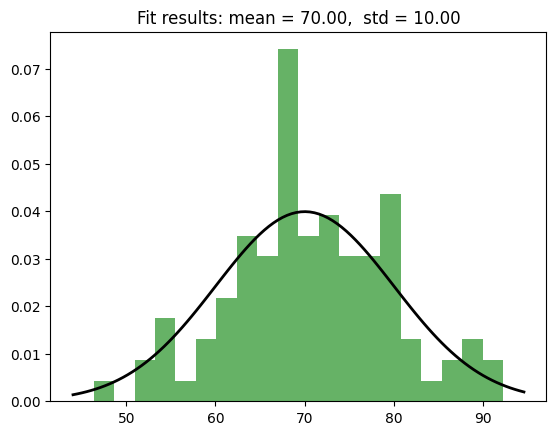

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the parameters for the normal distribution,
# where loc is the mean and scale is the standard deviation.
# Let's assume the average test score is 70 and the standard deviation is 10.
loc, scale = 70, 10

# Generate a sample of test scores
test_scores = np.random.normal(loc, scale, 100)

# Create a histogram of the test scores
plt.hist(test_scores, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, loc, scale)
plt.plot(x, p, 'k', linewidth=2)

title = "Fit results: mean = %.2f,  std = %.2f" % (loc, scale)
plt.title(title)
plt.savefig('normal_distribution.jpg',dpi=600,bbox_inches='tight')
plt.show()

**Binomial Distribution**

**Poisson Distribution**

In [ ]:
Outliers or Anamolies


In [ ]:
Array and Matrices
